In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 ! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohamjadiye","key":"2c8283fc5d29cc30347b9776e59e53bc"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37          22708        471  1.0              
samyakb/student-stress-factors                              Student stress factors                            887B  2023-11-02 12:42:11           2751         59  0.9411765        
joebeachcapital/30000-spotify-songs                         30000 Spotify Songs                                3MB  2023-11-01 06:06:43           2420         58  1.0              
anshika2301/hr-analytics-dataset                            HR Analytics Dataset               

In [8]:
!kaggle datasets download -d puneet6060/intel-image-classification

 94% 326M/346M [00:01<00:00, 250MB/s]
100% 346M/346M [00:01<00:00, 239MB/s]


In [9]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [2]:
img_gen = ImageDataGenerator(rescale=1./255)

train_loader = img_gen.flow_from_directory(
    directory = '/content/seg_train/seg_train',target_size = (227,227),batch_size=50,seed = 42)

test_loader = img_gen.flow_from_directory(
    directory = '/content/seg_test/seg_test',target_size = (227,227),batch_size=50,seed = 42)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [3]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [4]:
idx_to_classes = {val:key for key, val in dict(train_loader.class_indices).items()}

idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def AlexNet():
  inp = layers.Input((227, 227, 3))
  x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2,padding='valid')(x)
  x = layers.Conv2D(256, 5, 1,padding='same', activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Conv2D(384, 3, 1,padding='same', activation='relu')(x)
  x = layers.Conv2D(384, 3, 1,padding='same', activation='relu')(x)
  x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
  x = layers.MaxPooling2D(3, 2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(6, activation='softmax')(x)

  model = Model(inputs=inp, outputs=x)

  return model

model = AlexNet()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024  

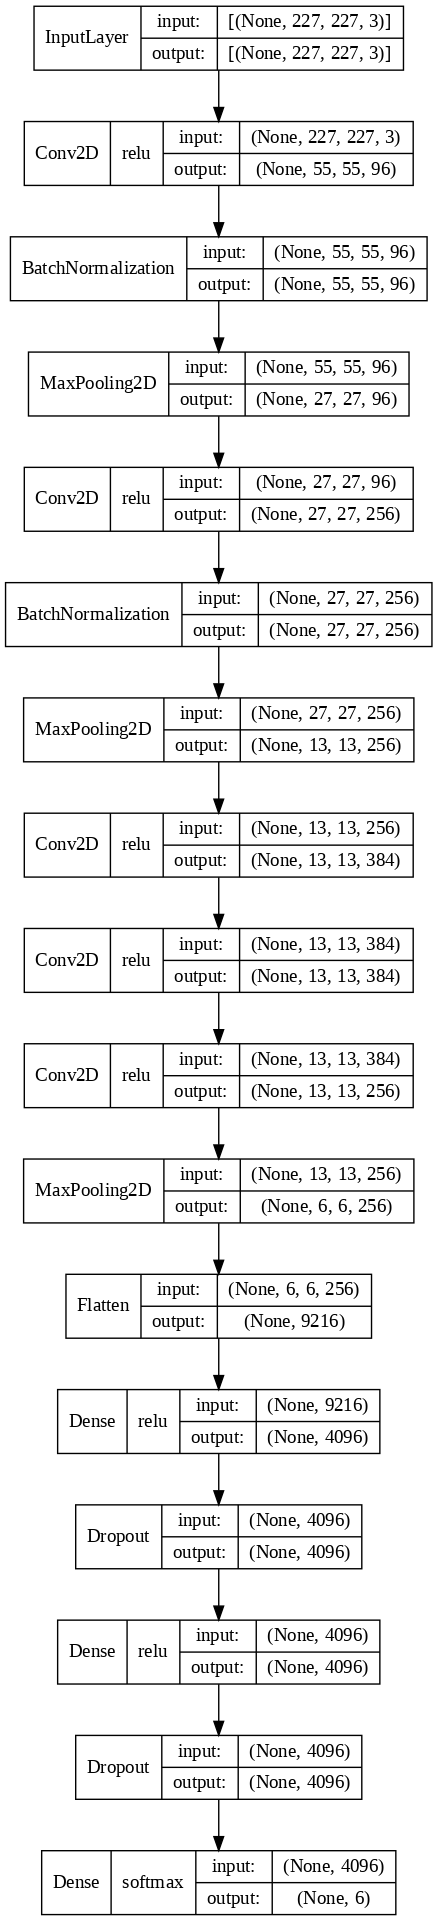

In [6]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    show_layer_activations=True,
    dpi=100
)

In [7]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [8]:
train_steps = len(train_loader)    # = (round(total_train_images / batch_size))
test_steps = len(test_loader)

In [9]:
model.fit(train_loader, epochs=100, validation_data=test_loader)

Epoch 1/100
281/281 [==============================] - 40s 112ms/step - loss: 1.6975 - accuracy: 0.3742 - val_loss: 1.3211 - val_accuracy: 0.4533
Epoch 2/100
281/281 [==============================] - 31s 109ms/step - loss: 1.2150 - accuracy: 0.4857 - val_loss: 1.2347 - val_accuracy: 0.4877
Epoch 3/100
281/281 [==============================] - 32s 113ms/step - loss: 1.1826 - accuracy: 0.5049 - val_loss: 1.2302 - val_accuracy: 0.4720
Epoch 4/100
281/281 [==============================] - 31s 111ms/step - loss: 1.1717 - accuracy: 0.5304 - val_loss: 1.2793 - val_accuracy: 0.4490
Epoch 5/100
281/281 [==============================] - 32s 114ms/step - loss: 1.0873 - accuracy: 0.5755 - val_loss: 1.2137 - val_accuracy: 0.5123
Epoch 6/100
281/281 [==============================] - 29s 104ms/step - loss: 1.0863 - accuracy: 0.5918 - val_loss: 1.6784 - val_accuracy: 0.4167
Epoch 7/100
281/281 [==============================] - 32s 112ms/step - loss: 0.9528 - accuracy: 0.6275 - val_loss: 0.9652 -

In [12]:
import os
pred_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir("seg_pred/seg_pred")]

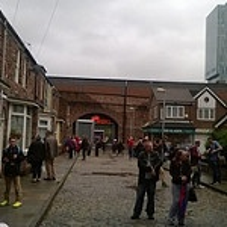

Model Prediction:  street


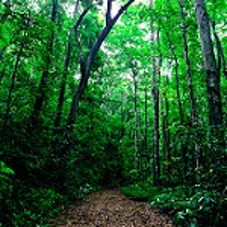

Model Prediction:  forest


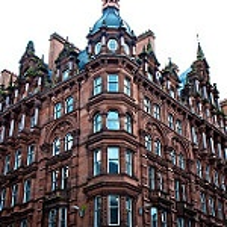

Model Prediction:  buildings


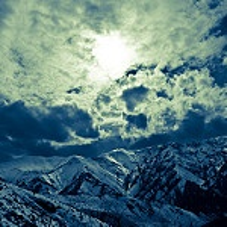

Model Prediction:  sea


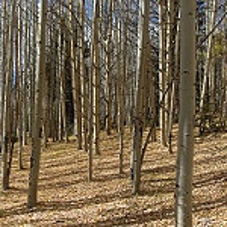

Model Prediction:  forest


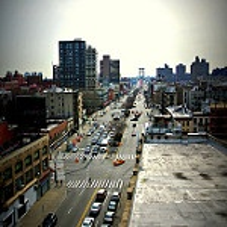

Model Prediction:  mountain


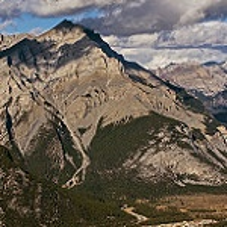

Model Prediction:  mountain


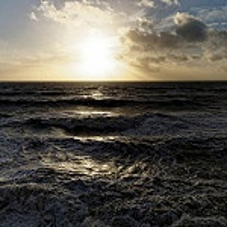

Model Prediction:  sea


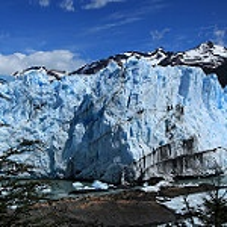

Model Prediction:  glacier


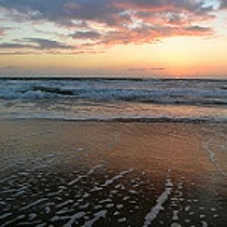

Model Prediction:  sea


In [17]:
import random
from random import randint
from PIL import Image
for i in range(10):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((227, 227))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ",idx_to_classes[pred])
  print("==========================================")

In [10]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "intel_classifier_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)
